This notebook plots the results generated by the notebook TW_Fits.ipynb
It reads the data from an ascii file and flots them in histograms and saving in a root file.

To understand the workflow, see https://github.com/larissahmendes/timewalk/blob/master/workflow/workflow_planning.png


In [1]:
#include <sstream>
#include <string>
#include <cmath>
#include <math.h>
#include <cstdlib>
#include "TH1.h"
#include "TH2.h"
#include "TCanvas.h"
#include "TGraph.h"
#include "TFile.h"
#include "TString.h"
#include "TStyle.h"

using namespace std;

In [2]:
gStyle->SetOptStat(0);

// Output file to storage the histograms
TFile *file = new TFile("../results/timewalk_parameter_histograms.root","RECREATE");

// Read every column of the input text file by its header and save the values into a TTree
TTree *tree = new TTree("mytree","Parameters");
tree->ReadFile("../results/loweredge_parameters.txt",  "row/I:col/I:t0/D:t/D:deltaT/D:VTP_t/D:par0/D:par1/D:par2/D:par3/D");

//tree->Print(); // This print can show the number of lines and bytes in the file


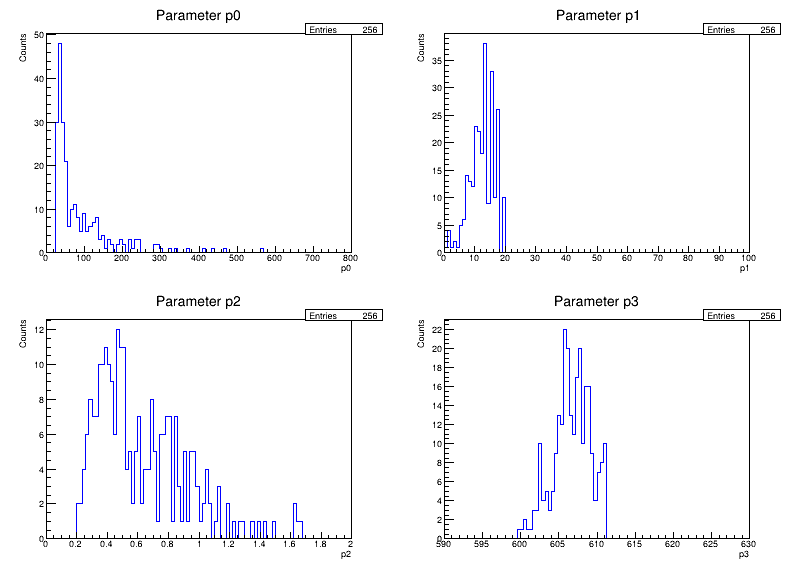

Info in <TCanvas::Print>: png file ../deliver/images/parameters_histogram.png has been created


In [3]:
%jsroot on // Uncomment this and you will be able to open an interactive histogram 

TCanvas *canvas_par = new TCanvas("canvas_par","canvas_par",800,600);
canvas_par->Divide(2,2);
gStyle->SetOptStat("e");

canvas_par->cd(1);
int p0min = 0;
int p0max = 800;
TH1F *h_p0 = new TH1F("h_p0", "par0", 100, p0min, p0max);
mytree->Draw("par0>>h_p0");
h_p0->GetYaxis()->SetTitle("Counts");
h_p0->GetXaxis()->SetTitle("p0");
h_p0->SetTitle("Parameter p0");
h_p0->SetLineColor(4);

canvas_par->cd(2);
int p1min = 0;
int p1max = 100;
TH1F *h_p1 = new TH1F("h_p1", "par1", 100, p1min, p1max);
mytree->Draw("par1>>h_p1");
h_p1->GetYaxis()->SetTitle("Counts");
h_p1->GetXaxis()->SetTitle("p1");
h_p1->SetTitle("Parameter p1");
h_p1->SetLineColor(4);

canvas_par->cd(3);
int p2min = 0;
int p2max = 2;
TH1F *h_p2 = new TH1F("h_p2", "par2", 100, p2min, p2max);
mytree->Draw("par2>>h_p2");
h_p2->GetYaxis()->SetTitle("Counts");
h_p2->GetXaxis()->SetTitle("p2");
h_p2->SetTitle("Parameter p2");
h_p2->SetLineColor(4);

canvas_par->cd(4);
int p3min = 590;
int p3max = 630;
TH1F *h_p3 = new TH1F("h_p3", "par3", 100, p3min, p3max);
mytree->Draw("par3>>h_p3");
h_p3->GetYaxis()->SetTitle("Counts");
h_p3->GetXaxis()->SetTitle("p3");
h_p3->SetTitle("Parameter p3");
h_p3->SetLineColor(4);

canvas_par->Draw();
canvas_par->SaveAs("../deliver/images/parameters_histogram.png")


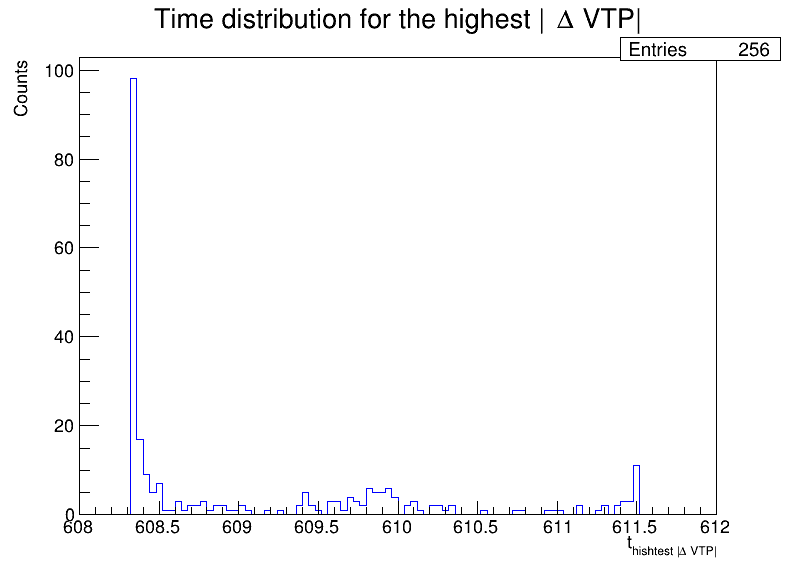

Info in <TCanvas::Print>: png file ../deliver/images/time_for_highest_charge_distribution.png has been created


In [4]:
%jsroot on // Uncomment this and you will be able to open an interactive histogram 

TCanvas *canvas_t0 = new TCanvas("canvas_t0","canvas_t0",800,600);

int t0min = 608;
int t0max = 612;

TH1F *h_t0 = new TH1F("h_t0", "t0", 100, t0min, t0max);
mytree->Draw("t0>>h_t0");
h_t0->GetYaxis()->SetTitle("Counts");
h_t0->GetXaxis()->SetTitle("t_{hishtest |#Delta VTP|}");
h_t0->SetTitle("Time distribution for the highest |#Delta VTP|");
h_t0->SetLineColor(4);
canvas_t0->Draw(); // With "%jsroot on" you will be able to open an interactive histogram. Be aware that this increases the notebook size.
canvas_t0->SaveAs("../deliver/images/time_for_highest_charge_distribution.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_t0


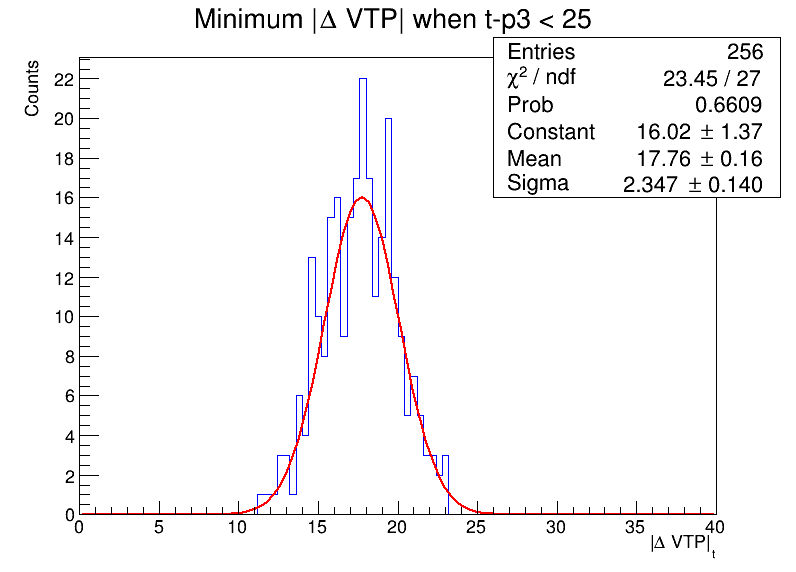

 FCN=23.4456 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=7.85085e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.60169e+01   1.36617e+00   2.53564e-03  -9.60493e-06
   2  Mean         1.77636e+01   1.62271e-01   3.88696e-04  -8.10233e-05
   3  Sigma        2.34685e+00   1.40418e-01   3.69604e-05   1.45757e-03


Info in <TCanvas::Print>: png file ../deliver/images/minimum_vtp_distribution.png has been created


In [5]:
%jsroot on // Uncomment this and you will be able to open an interactive histogram 

TCanvas *canvas_minVTP = new TCanvas("canvas_t0","canvas_t0",800,600);

gStyle->SetOptFit(1111);

int tVTPmin = 0;
int tVTPmax = 40;

TH1F *h_minVTP = new TH1F("h_minVTP", "VTP_t", 100, tVTPmin, tVTPmax);
mytree->Draw("VTP_t>>h_minVTP");
h_minVTP->GetYaxis()->SetTitle("Counts");
h_minVTP->GetXaxis()->SetTitle("|#Delta VTP|_{t}");
h_minVTP->SetTitle("Minimum |#Delta VTP| when t-p3 < 25");
h_minVTP->SetLineColor(4);
h_minVTP->Fit("gaus");

canvas_minVTP->Draw(); // With "%jsroot on" you will be able to open an interactive histogram. Be aware that this increases the notebook size.
canvas_minVTP->SaveAs("../deliver/images/minimum_vtp_distribution.png")
